<center><img src="Bottleneck Logo.png" width="400" height="400"/>

**Scénario :**<p>
Vous commencez votre mission en tant que data analyst freelance chez BottleNeck, un marchand de vin très prestigieux.<p>

Le site de vente en ligne n'est pas relié à l'ERP , ce qui pose des problemes de gestion des stocks et d'analyse des ventes.

**Mes missions sont :**</p> 
       - rapprocher plusieurs fichiers issus de 3 sources differentes</p>
       - calculer le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne</p>
       - analyser une variable pour detecter les eventuels erreurs de saisies ou valeurs aberrantes</p>

---

**Compétences évaluées :**<p>

- Réaliser une analyse univariée pour interpréter des données :<p>
    - détecter les outliers via plusieurs méthodes différentes (zscore et interquartile)<p>
    - représenter graphiquement les outliers<p>
- Classifier différents types de données<p>
- Gérer les erreurs et les incohérences présentes sur des données stockées :<p>
    - corriger la présence de doublon<p>
    - choisir le type de jointure correct et cohérent par rapport au but attendu<p>
    - identifier et traiter les valeurs manquantes

---

## Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

---

# 1.Rapprocher les données

## Chargement des données qui constitueront le dataframe

#### Fichier ERP

*fichier issu de l’ERP*

In [2]:
erp = pd.read_excel('erp.xlsx')

In [3]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [4]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [5]:
# pourcentage de valeurs manquantes
erp.isna().mean()*100

product_id        0.0
onsale_web        0.0
price             0.0
stock_quantity    0.0
stock_status      0.0
dtype: float64

In [6]:
# création d'une fonction pour la recherche de doublons
def check_possible_primary_key(df, columns_pk):
    if len(df) != len(df[columns_pk].drop_duplicates()):
        raise Exception("{} can't be a primary key!".format(columns_pk))
    else :
        print("{} is a possible primary key!".format(columns_pk))

In [7]:
# recherche de doublons sur la colonne product id 
check_possible_primary_key(erp,"product_id")

product_id is a possible primary key!


#### Fichier Web

*Fichier de la table produit de la plateforme de vente en ligne*

In [8]:
web = pd.read_excel('web.xlsx')

In [9]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [10]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [11]:
# pourcentage de valeurs manquantes
web.isna().mean()*100

sku                        5.617978
virtual                    0.000000
downloadable               0.000000
rating_count               0.000000
average_rating             5.485790
total_sales                5.485790
tax_status                52.676801
tax_class                100.000000
post_author                5.485790
post_date                  5.485790
post_date_gmt              5.485790
post_content             100.000000
post_title                 5.485790
post_excerpt              52.676801
post_status                5.485790
comment_status             5.485790
ping_status                5.485790
post_password            100.000000
post_name                  5.485790
post_modified              5.485790
post_modified_gmt          5.485790
post_content_filtered    100.000000
post_parent                5.485790
guid                       5.485790
menu_order                 5.485790
post_type                  5.485790
post_mime_type            52.808989
comment_count              5

In [12]:
# recherche de doublons sur la colonne "sku"
check_possible_primary_key(web,"sku")

Exception: sku can't be a primary key!

In [13]:
web.sort_values(('post_name'),ascending=True)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
883,16093,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-13 14:48:58,...,8planeta-sicilia-etna-rosso-2018,2020-06-23 18:35:03,2020-06-23 16:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
85,16093,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-13 14:48:58,...,8planeta-sicilia-etna-rosso-2018,2020-06-23 18:35:03,2020-06-23 16:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
610,15325,0,0,0,0.0,4.0,taxable,NaN,2.0,2019-03-27 17:59:49,...,agnes-levet-amethyste-2017,2020-05-21 14:00:02,2020-05-21 12:00:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1381,15325,0,0,0,0.0,4.0,NaN,NaN,2.0,2019-03-27 17:59:49,...,agnes-levet-amethyste-2017,2020-05-21 14:00:02,2020-05-21 12:00:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
611,15328,0,0,0,0.0,3.0,taxable,NaN,2.0,2019-03-27 18:05:09,...,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Il existe 2 lignes par produits une "product" une "attachment"

In [14]:
# création d'un sous-echantillons de web qui ne contient que les sku sans NaN
web = web[web['sku'].notnull()]

In [15]:
# création d'un sous-echantillons de web qui ne contient que les post_types='product' et exclure 'attachment'
web = web[(web['post_type'] == 'product')]
web.sort_values(('post_name'),ascending=True)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
85,16093,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-13 14:48:58,...,8planeta-sicilia-etna-rosso-2018,2020-06-23 18:35:03,2020-06-23 16:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
610,15325,0,0,0,0.0,4.0,taxable,NaN,2.0,2019-03-27 17:59:49,...,agnes-levet-amethyste-2017,2020-05-21 14:00:02,2020-05-21 12:00:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
611,15328,0,0,0,0.0,3.0,taxable,NaN,2.0,2019-03-27 18:05:09,...,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
612,15329,0,0,0,0.0,3.0,taxable,NaN,2.0,2019-03-27 18:28:15,...,agnes-levet-cote-rotie-peroline-2017,2020-07-28 09:45:02,2020-07-28 07:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
412,15530,0,0,0,0.0,10.0,taxable,NaN,2.0,2018-05-17 11:17:53,...,alain-graillot-crozes-hermitage-blanc-2018,2020-07-28 09:45:02,2020-07-28 07:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,13215,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-04-18 17:05:30,...,zind-humbrecht-pinot-gris-windsbuhl-2013,2019-09-05 10:50:02,2019-09-05 08:50:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
649,13211,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-04-18 17:36:03,...,zind-humbrecht-riesling-clos-windsbuhl-2014,2019-10-16 17:50:03,2019-10-16 15:50:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
64,15382,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-13 11:08:45,...,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,2020-02-08 10:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
63,15353,0,0,0,0.0,2.0,taxable,NaN,2.0,2018-02-13 10:56:04,...,zind-humbrecht-riesling-herrenweg-turckheim-2017,2020-06-03 14:35:02,2020-06-03 12:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


#### notre sous echantillon Web ne contient plus que 714 lignes

In [16]:
check_possible_primary_key(web,"sku")

sku is a possible primary key!


### Fichier Liaison

*lien entre la référence du produit dans l’ERP (product_id) et la référence du même produit dans la base de la boutique en ligne (SKU)*

In [17]:
liaison = pd.read_excel('liaison.xlsx')

In [18]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [19]:
liaison = liaison.rename(columns={"id_web": "sku"})

In [20]:
check_possible_primary_key(liaison,"product_id")

product_id is a possible primary key!


#### Fusion des datasets Liaison et erp

In [21]:
df = pd.merge(liaison, erp, how="inner", on=["product_id"])

In [22]:
df.head()

,product_id,sku,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock


In [23]:
df.shape

(825, 6)

#### Fusion des deux precedents dataset " liaison et erp" avec "web"

In [24]:
df = pd.merge(df, web, how="inner", on=["sku"])

In [25]:
df.shape

(714, 33)

In [26]:
df.head()

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,15298,1,24.2,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,15296,1,34.3,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,15300,1,20.8,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,19814,1,14.1,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,19815,1,46.0,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


---

# 2.Le chiffre d’affaires

## Chiffre d'affaires

In [27]:
#création d'une colonne chiffre d'affaires => price * total_sales
df['revenues']= df['price']*df['total_sales']
df[['product_id','price','total_sales','revenues']]

,product_id,price,total_sales,revenues
0,3847,24.2,6.0,145.2
1,3849,34.3,0.0,0.0
2,3850,20.8,0.0,0.0
3,4032,14.1,3.0,42.3
4,4039,46.0,0.0,0.0
...,...,...,...,...
709,6930,8.4,5.0,42.0
710,7023,27.5,0.0,0.0
711,7025,69.0,0.0,0.0
712,7247,54.8,0.0,0.0


## Chiffre d'affaires total réalisé en ligne

In [28]:
ca=df['revenues'].sum()
print("Le chiffre d'affaires est de ",ca,"euros")

Le chiffre d'affaires est de  70568.6 euros


## Chiffre d'affaires par produit

In [49]:
caproduit=df[['post_title','price','total_sales','revenues']].groupby(by=["post_title"]).sum()
caproduit10=caproduit.nlargest(10, "revenues")
caproduit10

,price,total_sales,revenues
post_title,,,
Champagne Gosset Grand Blanc de Blancs,49.0,96.0,4704.0
Champagne Gosset Grand Rosé,49.0,87.0,4263.0
Cognac Frapin VIP XO,176.0,13.0,2288.0
Champagne Gosset Grand Millésime 2006,53.0,30.0,1590.0
Champagne Gosset Grande Réserve,39.0,40.0,1560.0
Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5,11.0,1391.5
Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,5.0,1125.0
Elian Daros Côtes du Marmandais Clos Baquey 2015,29.0,36.0,1044.0
Domaine Giudicelli Patrimonio Blanc 2019,25.2,41.0,1033.2


### Visualisation du chiffre d'affaires par produit

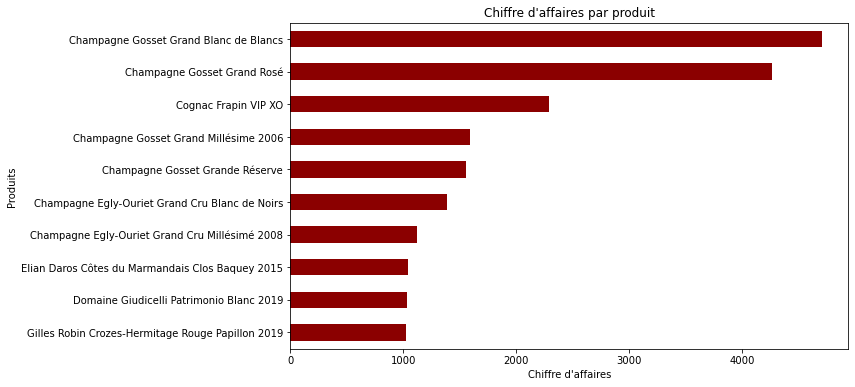

In [30]:
caproduit10['revenues'].sort_values().plot(kind='barh', figsize=(10,6),color='darkred')
plt.title("Chiffre d'affaires par produit")
plt.ylabel('Produits')
plt.xlabel('Chiffre d\'affaires');

---

# 3.Analyse univariée et interprétation

#### Visualiser la distribution de la variable "Price" (Variable quantitative continue)

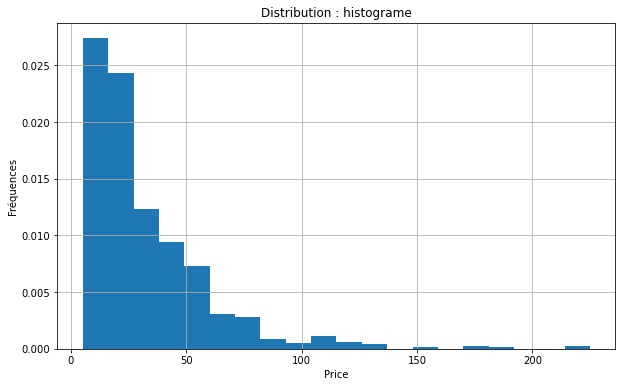

In [31]:
# Histogramme x='price' y= fréquences (effectif sous forme de proportion)
plt.figure(figsize=(10,6))
df["price"].hist(density=True,bins=20)
plt.title("Distribution : histograme")
plt.ylabel('Fréquences')
plt.xlabel('Price')
plt.show()

**Données asymétriques**

   - la distribution n'est pas "normale" => les données sont asymétriques , à droite
   - le pic des données se situe au debut avec des prix entre 10€ et 20€
   - on constate que la plupart des prix sont inférieurs a 50€
   - quelques valeurs sont très éloignées des autres

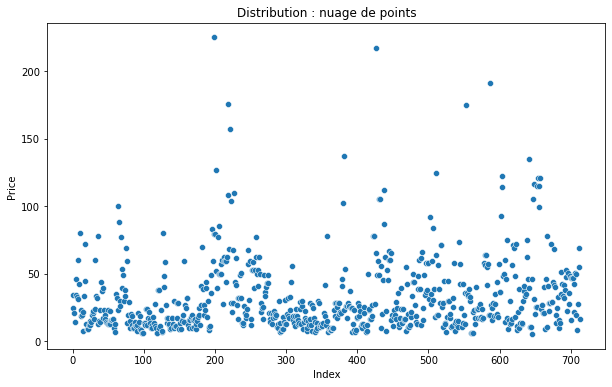

In [32]:
plt.figure(figsize=(10,6))
sb.scatterplot(x=df.index,y=df['price'])
plt.title("Distribution : nuage de points")
plt.ylabel('Price')
plt.xlabel('Index')
plt.show()

### Rechercher et visualiser les données abérantes

#### Statistiques descriptives

In [33]:
df["price"].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

Avec 75% des valeurs en dessous de 42€ on pourrait considérer la valeur max de 225€ comme aberrante

#### Avec un boxplot

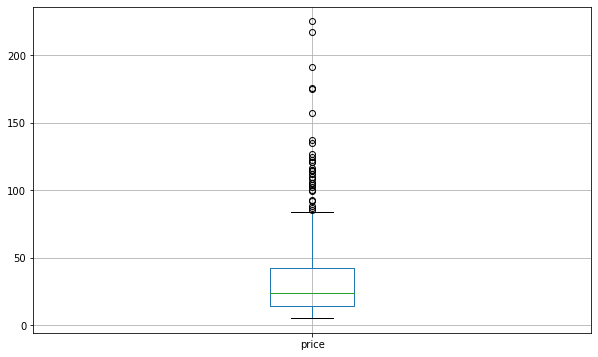

In [34]:
# On peut repérer les valeurs aberrantes en utilisant une boîte à moustache
plt.figure(figsize=(10,6))
df.boxplot(column=['price'])
plt.show()

### Il existe des tests statistiques qui permettent de mettre en évidence les valeurs aberrantes

#### Méthode de l'écart interquartile

une valeur est considérée comme aberrante si la valeur absolue de l'écart avec Q1 ou Q3 est supérieure à plus de 1,5× l'écart interquartile

In [35]:
Q1 = round(np.quantile(df.price, 0.25)) # On calcule Q1
print("Q1 =",Q1)
Q3 = round(np.quantile(df.price, 0.75)) # On calcule Q3
print("Q3 =",Q3)
EIQ = Q3 - Q1 # On calcule l'écart interquartile (EIQ)
print("EIQ =",EIQ)
Borne_inf = Q1 - (EIQ*1.5) # On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile
print("Borne_inf =",Q1,"-(",EIQ,"*","1.5 ) =",Borne_inf)
Borne_sup = Q3 + (EIQ*1.5) # On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile
print("Borne_sup =",Q3,"+(",EIQ,"*","1.5 ) =",Borne_sup)

Q1 = 14
Q3 = 42
EIQ = 28
Borne_inf = 14 -( 28 * 1.5 ) = -28.0
Borne_sup = 42 +( 28 * 1.5 ) = 84.0


In [36]:
#selection sur notre dataframe des prix situés en dehors de nos bornes
df[['post_title','price']][(df.price<Borne_inf) | (df.price>Borne_sup)].style.background_gradient(cmap = 'Reds')

,post_title,price
63,Zind-Humbrecht Riesling Grand Cru Rangen De Thann Clos Saint-Urbain 2017,100.000000
65,Zind-Humbrecht Pinot Gris Grand Cru Rangen De Thann Clos Saint-Urbain 2012,88.400000
199,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.000000
201,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.500000
205,Champagne Larmandier-Bernier Grand Cru Les Chemins d'Avize 2011,85.600000
218,Cognac Frapin VIP XO,176.000000
219,Cognac Frapin Château de Fontpinot XO,108.500000
221,Cognac Frapin Château de Fontpinot 1989 20 Ans d'Age,157.000000
222,Cognac Frapin Cigar Blend,104.000000
227,Château de Meursault Puligny-Montrachet 1er Cru Champ Canet 2014,109.600000


In [37]:
# compter le nombre de valeurs abérrantes
df[['price']][(df.price<Borne_inf) | (df.price>Borne_sup)].count()

price    32
dtype: int64

la méthode interquartille fait apparaitre 32 valeurs aberrantes => les prix supérieures à 84€

In [38]:
#création d'une colonne pour indentifier si le prix est ou dessus le la borne sup ou non
df['IQ Outliers'] = np.where(df['price']>=Borne_sup, 'Oui', 'Non')
df[['post_title','price','IQ Outliers']]

,post_title,price,IQ Outliers
0,Pierre Jean Villa Saint-Joseph Préface 2018,24.2,Non
1,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,34.3,Non
2,Pierre Jean Villa Crozes-Hermitage Accroche Co...,20.8,Non
3,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,14.1,Non
4,Pierre Jean Villa Côte Rôtie Carmina 2017,46.0,Non
...,...,...,...
709,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,8.4,Non
710,Camin Larredya Jurançon Sec La Virada 2018,27.5,Non
711,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,69.0,Non
712,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,54.8,Non


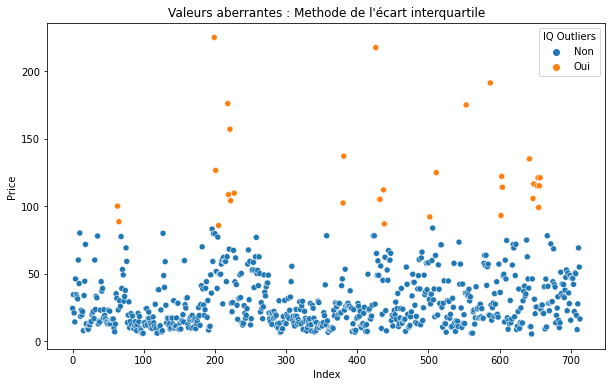

In [39]:
#un nuage de points avec les valeurs identifiées comme outliers (au dessus de la borne sup) en couleur
plt.figure(figsize=(10,6))
sb.scatterplot(x=df.index,y=df['price'],hue=df['IQ Outliers'])
plt.title("Valeurs aberrantes : Methode de l'écart interquartile")
plt.ylabel('Price')
plt.xlabel('Index')
plt.show()

#### Méthode Z Score

Cette methode attribue un score a une observation, ce score désigne le nombre d'écarts-types qui se trouve au-dessus ou en dessous de la moyenne de la population.

In [40]:
#création d'une colonne zscore avec l'équation (valeur observée - valeur moyenne)/deviation standard
df['zscore'] = (df.price - df.price.mean())/df.price.std()
df[['price','zscore']].head()

,price,zscore
0,24.2,-0.298201
1,34.3,0.064970
2,20.8,-0.420457
3,14.1,-0.661373
4,46.0,0.485674


In [41]:
#afficher notre dataframe dont les zscore sont suppérieur a 2 écarts types (2 pour etre cohérent avec la methode interquartille ci dessus)
df[['price','zscore']][df['zscore']>2]

,price,zscore
63,100.0,2.427385
65,88.4,2.010277
199,225.0,6.922087
201,126.5,3.380262
218,176.0,5.160164
219,108.5,2.733025
221,157.0,4.476969
222,104.0,2.571216
227,109.6,2.772578
380,102.3,2.510088


In [42]:
#afficher notre dataframe dont les zscore sont inférieur a -2
df[['price','zscore']][df['zscore']<-2]

,price,zscore


In [43]:
df[['post_title','price','zscore']][(df.zscore <-2) | (df.zscore >2)].style.background_gradient(cmap = 'Reds')

,post_title,price,zscore
63,Zind-Humbrecht Riesling Grand Cru Rangen De Thann Clos Saint-Urbain 2017,100.000000,2.427385
65,Zind-Humbrecht Pinot Gris Grand Cru Rangen De Thann Clos Saint-Urbain 2012,88.400000,2.010277
199,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.000000,6.922087
201,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.500000,3.380262
218,Cognac Frapin VIP XO,176.000000,5.160164
219,Cognac Frapin Château de Fontpinot XO,108.500000,2.733025
221,Cognac Frapin Château de Fontpinot 1989 20 Ans d'Age,157.000000,4.476969
222,Cognac Frapin Cigar Blend,104.000000,2.571216
227,Château de Meursault Puligny-Montrachet 1er Cru Champ Canet 2014,109.600000,2.772578
380,Domaine Des Croix Corton Grand Cru Les Grèves 2017,102.300000,2.510088


In [44]:
df[['price','zscore']][(df.zscore <-2) | (df.zscore >2)].count()

price     30
zscore    30
dtype: int64

Avec la méthode du Zscore et en prennant 2x l'écart type  nous obtenons 30 valeurs aberrantes => les prix suppérieurs à 88€

In [45]:
#création d'une colonne pour indentifier les zcore comme outliers ou non
df['zscore_outliers'] = ["Oui" if z >=2 else "Non" for z in df['zscore']]
df[['post_title','price','zscore','zscore_outliers']]

,post_title,price,zscore,zscore_outliers
0,Pierre Jean Villa Saint-Joseph Préface 2018,24.2,-0.298201,Non
1,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,34.3,0.064970,Non
2,Pierre Jean Villa Crozes-Hermitage Accroche Co...,20.8,-0.420457,Non
3,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,14.1,-0.661373,Non
4,Pierre Jean Villa Côte Rôtie Carmina 2017,46.0,0.485674,Non
...,...,...,...,...
709,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,8.4,-0.866332,Non
710,Camin Larredya Jurançon Sec La Virada 2018,27.5,-0.179541,Non
711,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,69.0,1.312700,Non
712,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,54.8,0.802101,Non


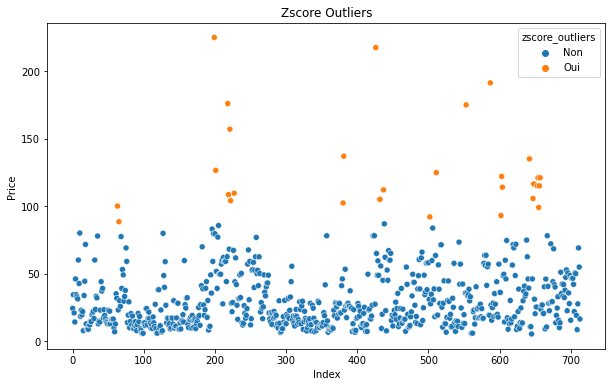

In [46]:
#un nuage de points avec les valeurs identifiées comme outliers (zscore > 2) en couleur
plt.figure(figsize=(10,6))
sb.scatterplot(x=df.index,y=df['price'],hue=df['zscore_outliers'])
plt.title("Zscore Outliers")
plt.ylabel('Price')
plt.xlabel('Index')
plt.show()

---

## Conclusion

**Bien que les différentes méthodes employées fassent ressortir des valeurs abérrantes, rien de nous permet de dire qu'il existe des erreurs de saisie sur le prix de certains produits.**